# Práctica 4 de IA
### Nmbres:
#### Daniel Tijerina Gonzáles
#### Suemy Inagaki Pinheiro Fagundes
#### Pareja 6

## 1. Construcción de clasificadores en bases de datos sintéticas

In [1]:
# Esta primera parte está adaptada de:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [11]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X*np.matrix([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

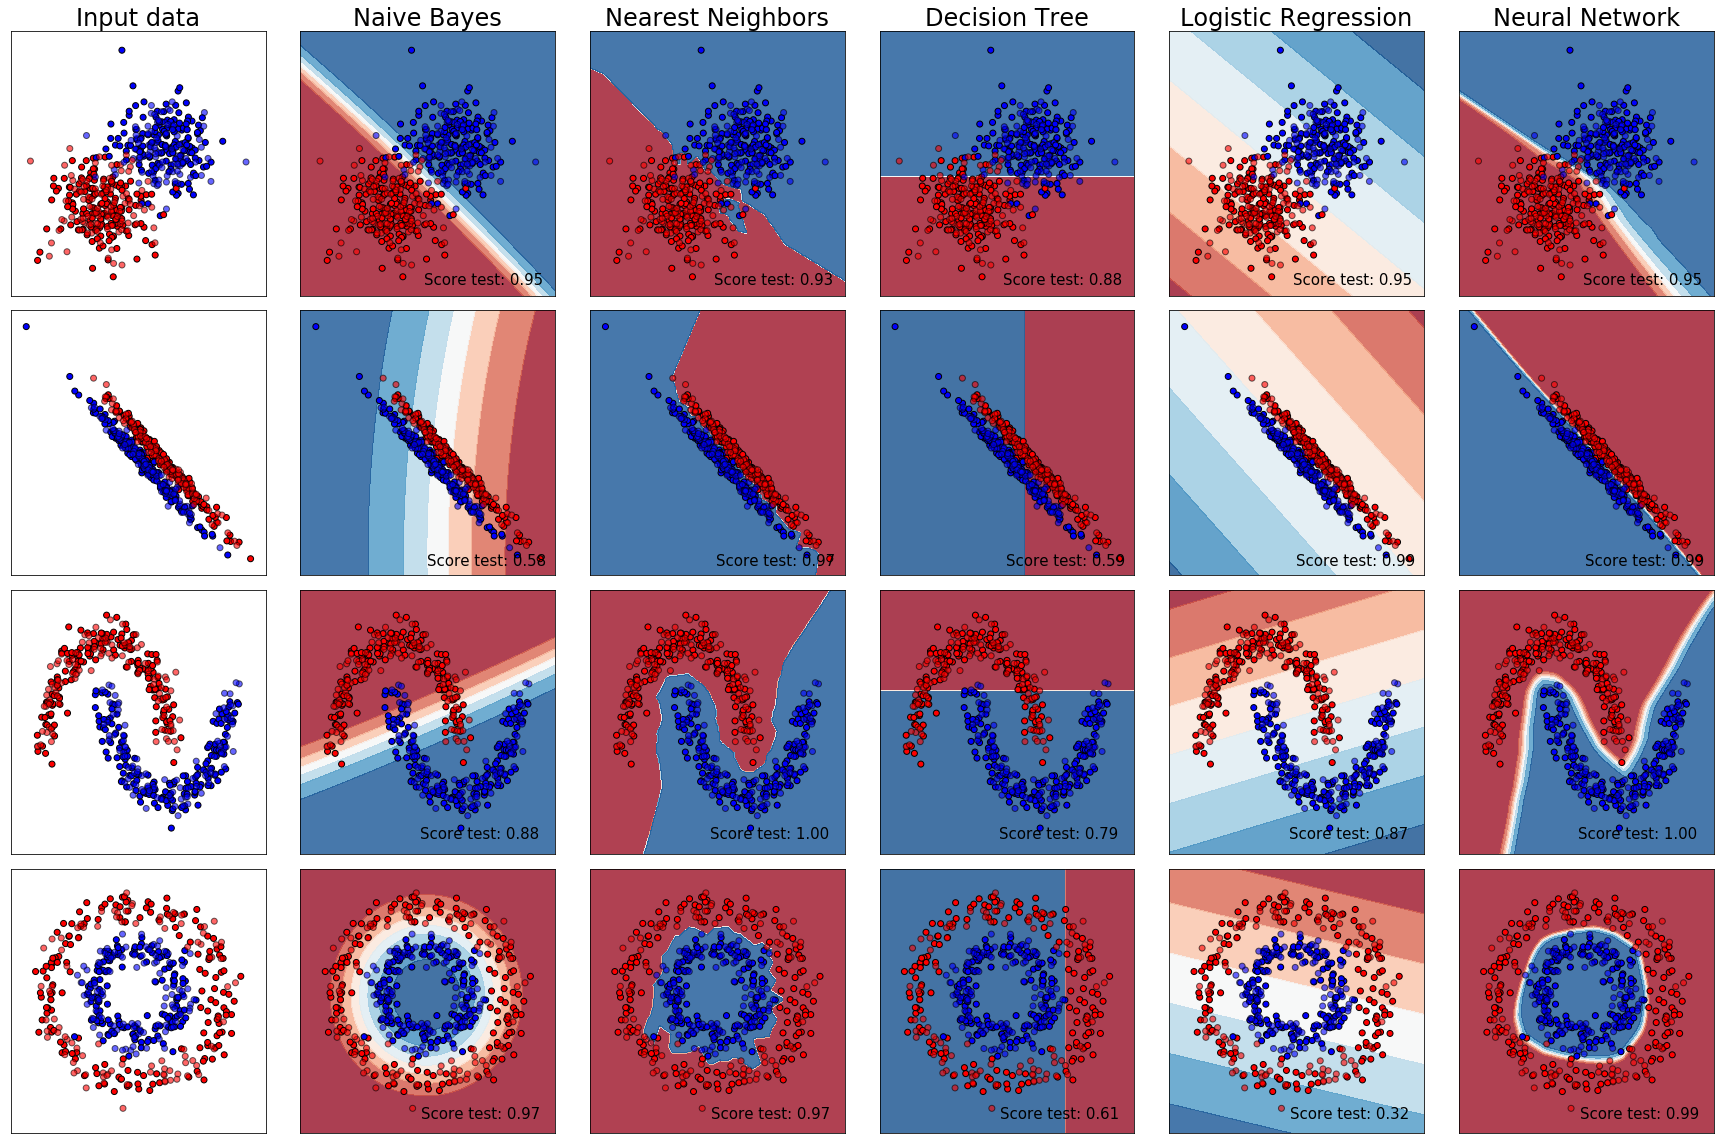

In [36]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=1)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=1)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1e10,solver='lbfgs')), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,20,10,10,10),
                              max_iter=2000,
                              alpha=0))]

from p4_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

In [14]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB(priors=None, var_smoothing=1e-09)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
MLPClassifier(activation='r

**Prueba a cambiar los siguientes parámetros y observa las consecuencias en la frontera de clasificación construida:**

##### 1) Número de vecinos en k-nn. ¿Por qué siempre debe ser impar cuando hay dos clases?
Para que no haya posibilidad de un empate entre las dos clases. Teniendo siempre un número impar de vecinos no es posible que no se clasifique en una o en otra clase. Si hay un empate entre las distancias de los vecinos más cercanos, la funcion debe tratarlos de manera que se elija solamente la cantidad indicada por k. Así siempre tendremos una clasificacion entre las dos clases.

###### Algunos Ejemplos cambiando el K:
Podemos ver que en los casos en que K es ímpar no hay la color blanca en la frontera de clasificación, en cuanto que cuando K es par, la frontera blanca se vé de una forma clara. Eso se debe a la explicación anterior. Como el número K es muy pequeño y los ejemplos son bastante simples el score no varia tanto entre un K par y un K ímpar, pero se puede ver una pequeña mejora en algunos casos cuando el K es ímpar. 

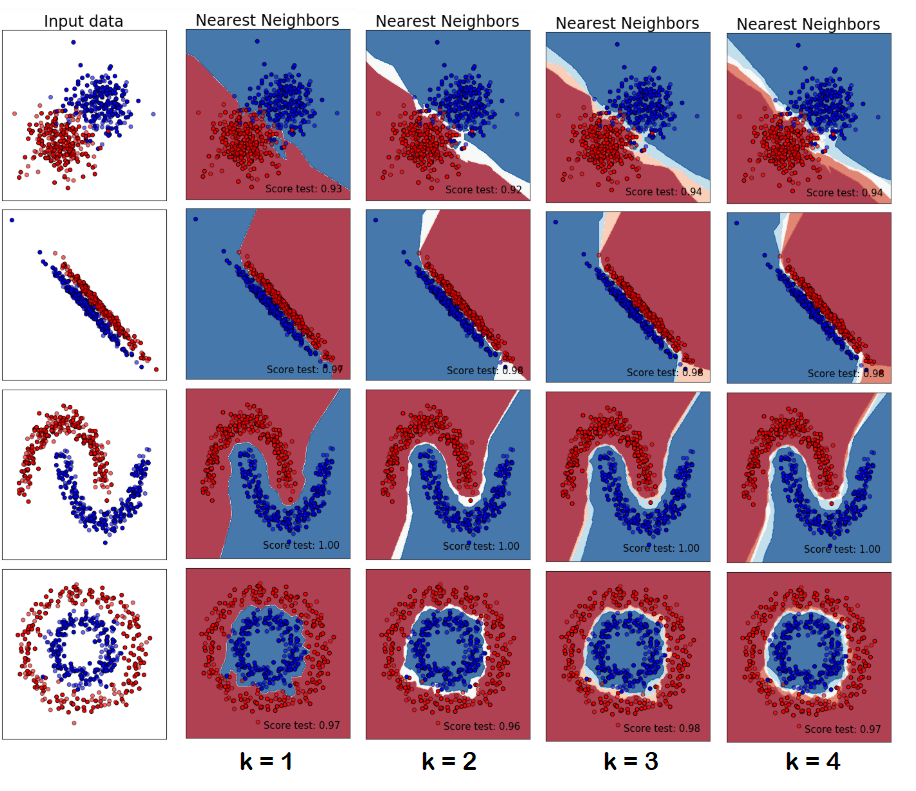

In [6]:
Image(filename='knn1.png') 



##### 2) Profundidad máxima de los árboles de decisión. 
Cambiamos el parámetro max_depth desde 1 hasta 6 y el resultado se pone a seguir. Se vé que el score aumenta cuando aumentamos la profundidad máxima de los árboles de decisión. Junto con el score, podemos ver la frontera cambiando y mejorando también en cuanto aumentamos la profundidad máxima. En los dos ultimos ejemplos se vé claramente el cambio de la frontera de clasificación, en cuanto con profundidad 1 solo dividia la region en dos partes, con profundidad 6 las regiones se encuentran casi completamente separadas. 

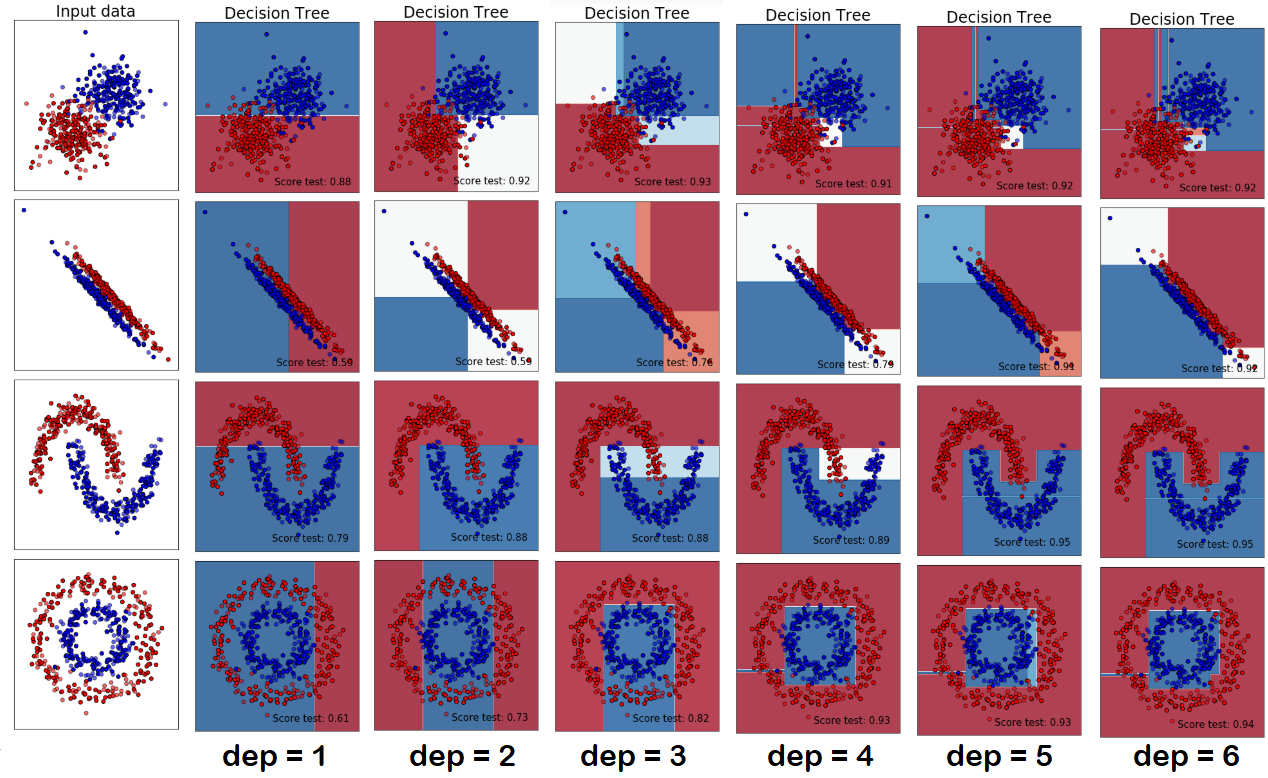

In [7]:
Image(filename='arb.png')


##### 3) Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. **Nota:** (50,) indica una única capa oculta con 50 neuronas. (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente. (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.

Hemos realizado algunos cambios y la conclusión a la que llegamos es que al añadir capas ocultas la frontera de clasificación se ajusta mejor, pero la diferencia es muy pequeña en comparación con cuando cambiamos el número de neuronas cuando tenemos solo una capa. 

En la segunda imagen, solo cambiamos el número de neuronas cuando solo había una capa oculta. Como se ve en los resultados, al tener solo una capa oculta, los resultados son mejores cuando tenemos más neuronas. 

Sin embargo, en general, la mejor frontera de clasificación se obtuvo cuando colocamos más capas ocultas, como se muestra en el último resultado en la primera imagen a continuación.

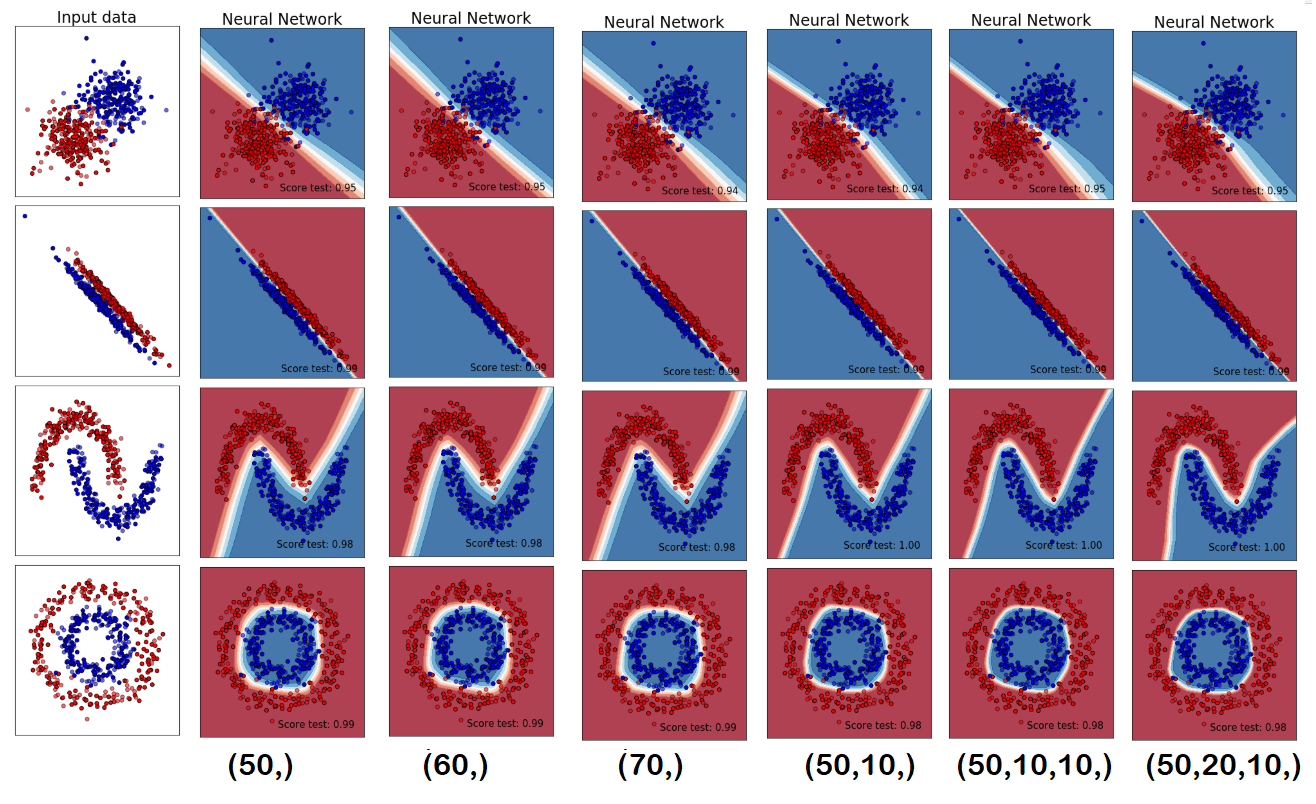

In [33]:
Image(filename='nn1.png')


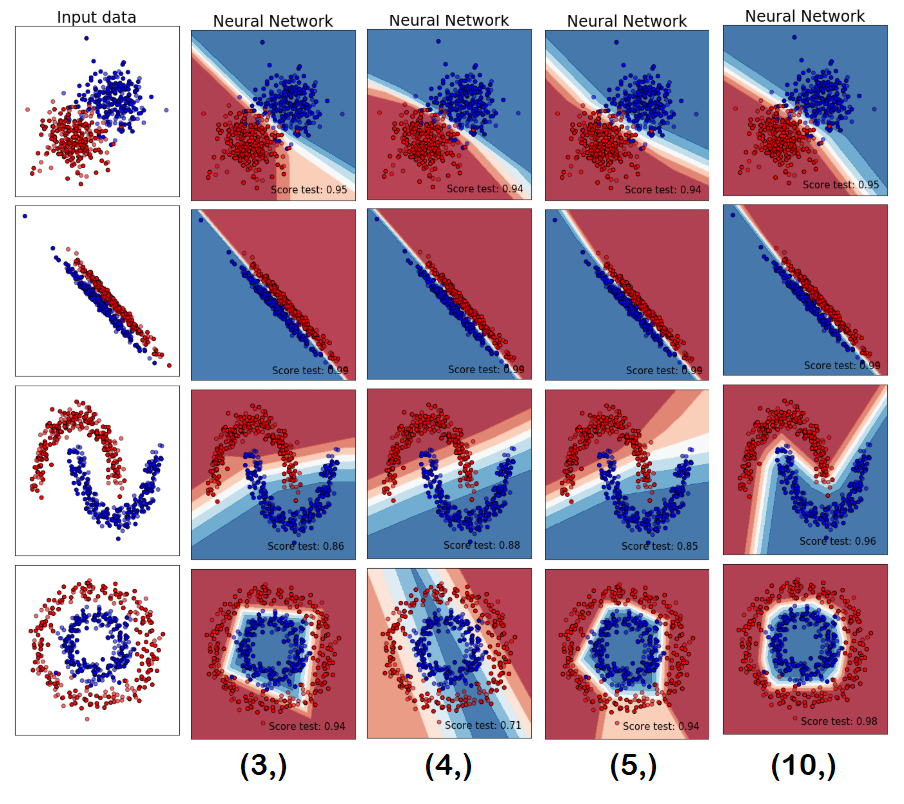

In [34]:
Image(filename='nn.png')